In [135]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as sci

In [136]:
def func(t,y):
    
    # The right-hand side for the 2D gravity ODE
    dy = np.zeros((4,))
    dy[0] = y[2]
    dy[1] = y[3]
    aux = y[0]*y[0]+y[1]*y[1]
    dy[2] = -y[0]/aux
    dy[3] = -y[1]/aux
    return dy

# initial condition for the unit circle solution
y0 = np.array([1,0,0,1])
y1 = np.array([1-0.01,0.01,0.01,1-0.01])

# for the exact solution
tt = np.linspace(0,2*np.pi,200)

# parameters
Nloops = 2
tmax = Nloops*2*np.pi
steps_per_loop = 40
Nt = Nloops*steps_per_loop
dt = 2*np.pi/steps_per_loop

In [137]:
sol = np.zeros((Nt+1,4))
sol[0,:] = y0
sol[1,:] = y1
t = dt

for j in range(1,Nt):
    sol[j+1,:] = -4*sol[j,:] + 5*sol[j-1,:] + dt*(4*func(t,sol[j,:]) + 5*func(t-dt,sol[j-1,:]))
    t = t + dt
    print(sol[j+1,:])

[ 1.04628319  1.36743351 -1.4599986   1.03358989]
[-0.14462293 -3.99276617  4.87499288  0.5178117 ]
[  7.72627581  23.94536252 -27.07146077   2.89159058]
[ -44.8089079  -113.52175261  132.66025485   -8.80462169]
[ 279.95803148  570.55276597 -666.00601835   49.65152158]
[-1658.14946777 -2825.53798954  3327.32727488  -242.62409643]
[  9599.92950939  14041.4667861  -16639.33963859   1218.75304959]
[-54531.99407949 -69718.34848644  83193.99502927  -6088.13250425]
[ 305331.44579395  346212.64781317 -415972.67833174   30446.29523242]
[-1690008.68473979 -1719093.97028599  2079860.68847789  -152225.84344498]
[  9266802.80222613   8535705.26627694 -10399306.14557119
    761134.84994092]
[-50417812.62562191 -42379613.68380788  51996528.02467441
  -3805668.61698837]
[ 2.72508051e+08  2.10403603e+08 -2.59982643e+08  1.90283487e+07]
[-1.46463520e+09 -1.04454558e+09  1.29991321e+09 -9.51417380e+07]
[ 7.83365072e+09  5.18536585e+09 -6.49956606e+09  4.75708695e+08]
[-4.17206272e+10 -2.57400189e+10  3.

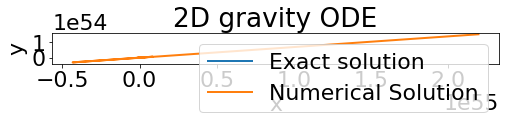

In [139]:
# plot the exact solution and the training points
fig, ax = plt.subplots(figsize=(8,8))
plt.plot(np.cos(tt),np.sin(tt),linewidth=2,label='Exact solution')
plt.plot(sol[:,0],sol[:,1],linewidth=2,label='Numerical Solution')  
plt.title("2D gravity ODE")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
ax.set_aspect(1)